In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# read the input data
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/pu9kbeSaAtRZ7RxdJKX9_A/yellow-tripdata.csv'
raw_data = pd.read_csv(url)
raw_data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tolls_amount,improvement_surcharge,tip_amount
0,2,1,17.63,2,1,132,164,1,70.0,0.5,6.94,1,16.54
1,2,1,19.52,2,1,132,236,1,70.0,0.5,6.94,1,16.19
2,2,1,17.81,2,1,132,48,1,70.0,0.5,6.94,1,12.00
3,2,2,19.30,2,1,132,148,1,70.0,0.5,0.00,1,5.00
4,2,1,18.75,2,1,132,234,1,70.0,0.5,6.94,1,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41197,2,1,16.94,2,1,132,164,1,70.0,0.5,6.94,1,5.00
41198,2,4,19.83,2,1,132,166,1,70.0,0.5,6.94,1,8.00
41199,2,1,17.31,2,1,132,137,1,70.0,0.5,6.94,1,8.00
41200,2,1,17.28,2,1,132,233,1,70.0,0.5,6.94,1,16.19


In [3]:
X = raw_data.drop(columns=['tip_amount'])
y = raw_data['tip_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor_tree = ColumnTransformer([
    ('scaler', StandardScaler(), X_train.columns),
])

pipeline_tree_reg = Pipeline([
     ('preprocessor', preprocessor_tree),
     ('tree', DecisionTreeRegressor(criterion= 'squared_error', max_depth=2, random_state=42)),
])

preprocessor_poly = ColumnTransformer([
    ('scaler', StandardScaler(), X_train.columns),
    ('poly', PolynomialFeatures(degree=2, include_bias=False), X_train.columns),
])

pipeline_poly = Pipeline([
     ('preprocessor', preprocessor_poly),
     ('poly_model', LinearRegression()),
])

TRAINING SET: 
RMSE using regression tree: 4.929467806113127, RMSE using polynomial linear regression: 4.901510836027425
TEST SET: 
RMSE using regression tree: 5.012749663231838, RMSE using polynomial linear regression: 4.9879021413404185


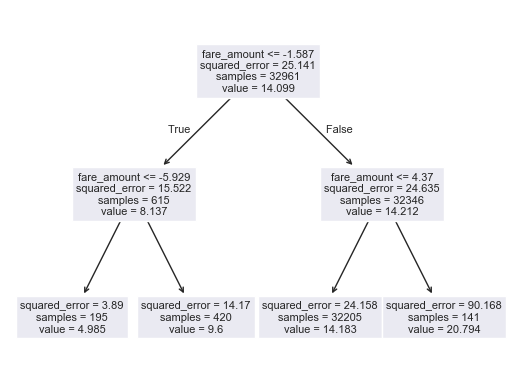

In [4]:
kfold = KFold(n_splits=10, shuffle = True, random_state=42)

MSE_tree = -cross_val_score(pipeline_tree_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error').mean()
MSE_poly = -cross_val_score(pipeline_poly, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error').mean()

RMSE_tree = np.sqrt(MSE_tree)
RMSE_poly = np.sqrt(MSE_poly)

print(f"TRAINING SET: \nRMSE using regression tree: {RMSE_tree}, RMSE using polynomial linear regression: {RMSE_poly}")

tree_model = pipeline_tree_reg.fit(X_train, y_train)
poly_model = pipeline_poly.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test)

MSE_tree = mean_squared_error(y_test, y_pred_tree)
MSE_poly = mean_squared_error(y_test, y_pred_poly)

RMSE_tree = np.sqrt(MSE_tree)
RMSE_poly = np.sqrt(MSE_poly)

print(f"TEST SET: \nRMSE using regression tree: {RMSE_tree}, RMSE using polynomial linear regression: {RMSE_poly}")

plot_tree(tree_model["tree"], feature_names=X_train.columns)
plt.show()